In [0]:
!pip install -U -q PyDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cd '/content/drive/My Drive/Colab Notebooks/pulsar_prediction'

In [0]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import *

PATH = '/content/drive/My Drive/Colab Notebooks/pulsar_prediction/'

In [0]:
df = pd.read_csv(PATH + 'pulsar_stars.csv')
df = df.fillna(0)
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


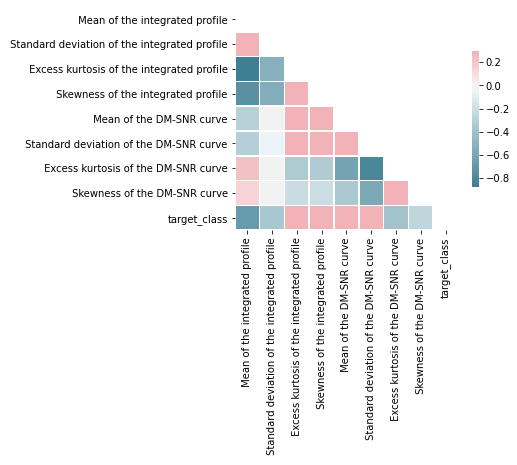

In [0]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
X = df.values[:, :-1]
y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
print(X_train.shape, X_test.shape)

(13423, 8) (4475, 8)


# Model 1 - LDA

In [0]:
from sklearn.discriminant_analysis import *
lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)

lda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.9743016759776536

# Model 2 - DummyClassifier

In [0]:
from sklearn.dummy import *
dc = DummyClassifier(strategy='most_frequent', random_state=None, constant=None)

dc.fit(X_train, y_train)
dc.score(X_test, y_test)

0.9094972067039107

# Model 3 - Linear

In [0]:
from sklearn.linear_model import *

sgd = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=None, random_state=1,
                    learning_rate='optimal', eta0=0.0, power_t=0.5,
                    early_stopping=False, validation_fraction=0.1,
                    n_iter_no_change=5, class_weight=None, warm_start=False,
                    average=False)
sgd.fit(X_train, y_train)
print("SGD\t", sgd.score(X_test, y_test))

rc = RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False,
                     copy_X=True, max_iter=None, tol=0.001, class_weight=None,
                     solver='auto', random_state=1)
rc.fit(X_train, y_train)
print("RC\t", rc.score(X_test, y_test))

pc = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000,
                tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None,
                random_state=0, early_stopping=False, validation_fraction=0.1,
                n_iter_no_change=5, class_weight=None, warm_start=False)
pc.fit(X_train, y_train)
print("PC\t", pc.score(X_test, y_test))

pca = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000,
      tol=0.001, early_stopping=False, validation_fraction=0.1,
      n_iter_no_change=5, shuffle=True, verbose=0, loss='hinge', n_jobs=None,
      random_state=585, warm_start=False, class_weight=None, average=False)
pca.fit(X_train, y_train)
print("PCA\t", pca.score(X_test, y_test))



SGD	 0.9756424581005586
RC	 0.9705027932960893
PC	 0.9745251396648045
PCA	 0.9754189944134078


# Model 4 - Ensembles

In [0]:
from sklearn.ensemble import *
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=7,
        min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
        min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
        random_state=2, verbose=0, warm_start=False, class_weight=None,
        ccp_alpha=0.0, max_samples=None)
rfc.fit(X_train, y_train)
print("rfc\t", rfc.score(X_test, y_test))

rfc	 0.9801117318435755


In [0]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.02,
    n_estimators=100, subsample=1.0, criterion='friedman_mse',
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_depth=4, min_impurity_decrease=0.0, min_impurity_split=None, init=None,
    random_state=2, max_features=None, verbose=0, max_leaf_nodes=None,
    warm_start=False, presort='deprecated', validation_fraction=0.1,
    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gbc.fit(X_train, y_train)
print("gbc\t", gbc.score(X_test, y_test))

gbc	 0.9814525139664805


# Model 5 - KNN

In [0]:
from sklearn.neighbors import *

knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto',
        leaf_size=5, p=2, metric='minkowski', metric_params=None,
        n_jobs=None)
knn.fit(X_train, y_train)
print("knn\t", knn.score(X_test, y_test))

knn	 0.976536312849162


# Model 6 - Naive Bayes

In [0]:
from sklearn.naive_bayes import *

gnb = GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(X_train, y_train)
print("gnb\t", gnb.score(X_test, y_test))

gnb	 0.9474860335195531


# Model 7 - XGBoost & LGBM

xgb	 0.9801117318435755


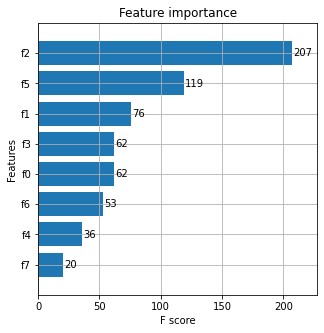

In [0]:
import xgboost as xgb

xgbm = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,
    silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1,
    nthread=None)
xgbm.fit(X_train, y_train)
print("xgb\t", xgbm.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(5,5))
xgb.plot_importance(xgbm, max_num_features=None, height=0.8, ax=ax)
plt.show()

lgb	 0.9812290502793296


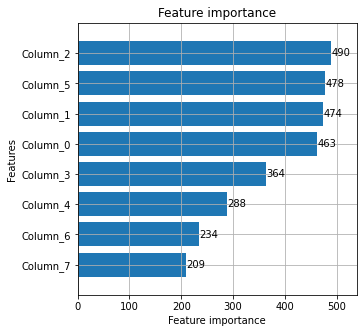

In [0]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(boosting_type='goss', num_leaves=31, max_depth=-1,
    learning_rate=0.1, n_estimators=100, subsample_for_bin=200000,
    objective=None, class_weight=None, min_split_gain=0.0,
    min_child_weight=0.001, min_child_samples=20, subsample=1.0,
    subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0,reg_lambda=0.0,
    random_state=None, n_jobs=-1, silent=True, importance_type='gain')

lgbm.fit(X_train, y_train)
print("lgb\t", lgbm.score(X_test, y_test))


fig, ax = plt.subplots(figsize=(5,5))
lgb.plot_importance(lgbm, max_num_features=None, height=0.8, ax=ax)
plt.show()

# Model 8 - CatBoost

In [0]:
!pip install catboost

In [0]:
from catboost import CatBoostClassifier, Pool
catb = CatBoostClassifier(iterations=None,
    learning_rate=None, depth=None, l2_leaf_reg=None,
    model_size_reg=None, rsm=None, loss_function=None,
    border_count=None, feature_border_type=None,
    per_float_feature_quantization=None, input_borders=None,
    output_borders=None, fold_permutation_block=None,
    od_pval=None, od_wait=None, od_type=None, nan_mode=None,
    counter_calc_method=None, leaf_estimation_iterations=None,
    leaf_estimation_method=None, thread_count=None,
    random_seed=None, use_best_model=None, verbose=False,
    logging_level=None, metric_period=None,
    ctr_leaf_count_limit=None, store_all_simple_ctr=None,
    max_ctr_complexity=None, has_time=None, allow_const_label=None,
    classes_count=None, class_weights=None, one_hot_max_size=None,
    random_strength=None, name=None, ignored_features=None,
    train_dir=None, custom_loss=None, custom_metric=None,
    eval_metric=None, bagging_temperature=None, save_snapshot=None,
    snapshot_file=None, snapshot_interval=None,
    fold_len_multiplier=None, used_ram_limit=None, gpu_ram_part=None,
    allow_writing_files=None, final_ctr_computation_mode=None,
    approx_on_full_history=None, boosting_type='Ordered',
    simple_ctr=None, combinations_ctr=None, per_feature_ctr=None,
    task_type=None, device_config=None, devices=None,
    bootstrap_type=None, subsample=None, sampling_unit=None,
    dev_score_calc_obj_block_size=None, max_depth=None, n_estimators=None,
    num_boost_round=None, num_trees=None, colsample_bylevel=None,
    random_state=None, reg_lambda=None, objective=None, eta=None,
    max_bin=None, scale_pos_weight=None, gpu_cat_features_storage=None,
    data_partition=None, metadata=None, early_stopping_rounds=None,
    cat_features=None,grow_policy=None, min_data_in_leaf=None,
    min_child_samples=None, max_leaves=None, num_leaves=None,
    score_function=None, leaf_estimation_backtracking=None,
    ctr_history_unit=None, monotone_constraints=None,
    model_shrink_rate=None, model_shrink_mode=None,
    langevin=None, diffusion_temperature=None, boost_from_average=None,
    text_features=None, tokenizers=None, dictionaries=None,
    feature_calcers=None, text_processing=None)


catb.fit(X_train, y_train, plot=True)
print("CatBoost\t", catb.score(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost	 0.9818994413407821


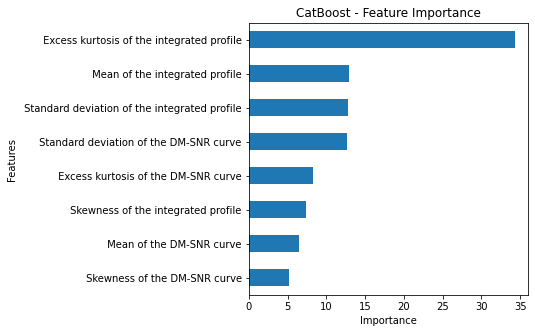

In [0]:
fea_imp = pd.DataFrame({'imp': catb.feature_importances_, 'col': df.columns[:-1]})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(5, 5), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

# Model 9 - Neuro

In [0]:
import tensorflow as tf
import os
from tensorflow import keras

In [0]:
def create_model():
    return tf.keras.Sequential(
        [
         tf.keras.layers.Conv1D(filters=64, kernel_size=2, input_shape=(8, 1), activation='relu'),
         tf.keras.layers.MaxPool1D(pool_size=2),
         tf.keras.layers.Dropout(0.1),
         tf.keras.layers.Conv1D(filters=32, kernel_size=2, input_shape=(8, 1), activation='relu'),
         tf.keras.layers.MaxPool1D(pool_size=2),
         #tf.keras.layers.Dropout(0.2),
         #tf.keras.layers.Dense(32, activation='relu'),
         #tf.keras.layers.Dropout(0.1),
         #tf.keras.layers.Dense(16, activation='relu'),
         #tf.keras.layers.Dropout(0.1),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(32, activation='relu'),
         tf.keras.layers.Dense(1, activation='sigmoid')])

# with strategy.scope():
model = create_model()
print(model.summary)
model.compile(optimizer='adam',
                loss=tf.keras.losses.MSE,
                metrics=['acc'])



X_train_ = X_train.reshape(-1, 8, 1)
y_train_ = y_train.reshape(-1, 1)
X_test_ = X_test.reshape(-1, 8, 1)
y_test_ = y_test.reshape(-1, 1)

history = model.fit(X_train_, y_train_,
          epochs=500, batch_size=256,
          validation_data=(X_test_, y_test_),
          verbose=1)



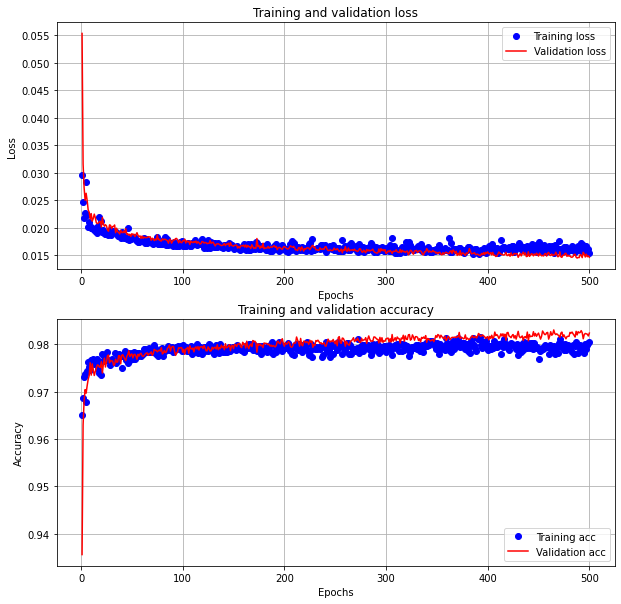

In [0]:
def ploting():
    # print(history.history.keys())
    ac = []
    for i in history.history.keys():
        ac.append(i)
    loss = history.history[ac[2]]
    val_loss = history.history[ac[0]]
    acc = history.history[ac[3]]
    val_acc = history.history[ac[1]]
    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    ax1.plot(epochs, loss, 'bo', label='Training loss')
    ax1.plot(epochs, val_loss, 'b', label='Validation loss', color='r')
    ax1.set_title('Training and validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax2.plot(epochs, acc, 'bo', label='Training acc')
    ax2.plot(epochs, val_acc, 'b', label='Validation acc', color='r')
    ax2.set_title('Training and validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    for ax in fig.axes:
        ax.grid(True)
    plt.savefig(PATH + 'graph')
    plt.show()

ploting()

# Rating

In [0]:
import operator
dict_ = {
    'LDA': lda.score(X_test, y_test),
    'DummyClassifier': dc.score(X_test, y_test),
    'SGDClassifier': sgd.score(X_test, y_test),
    'RidgeClassifier': rc.score(X_test, y_test),
    'Perceptron(SKLearn)': pc.score(X_test, y_test),
    'PassiveAggressiveCl': pca.score(X_test, y_test),
    'RandomForestCl': rfc.score(X_test, y_test),
    "GradientBoostingCl": gbc.score(X_test, y_test),
    "KNN": knn.score(X_test, y_test),
    "GaussianNB": gnb.score(X_test, y_test),
    "XGBoost": xgbm.score(X_test, y_test),
    "LGBMBoost": lgbm.score(X_test, y_test),
    "CatBoost": catb.score(X_test, y_test),
    "Neuro CNN": model.evaluate(X_test_, y_test_, verbose=0)[-1]
}

sorted_ = sorted(dict_.items(), key=operator.itemgetter(1), reverse=True)
#dict(sorted_)

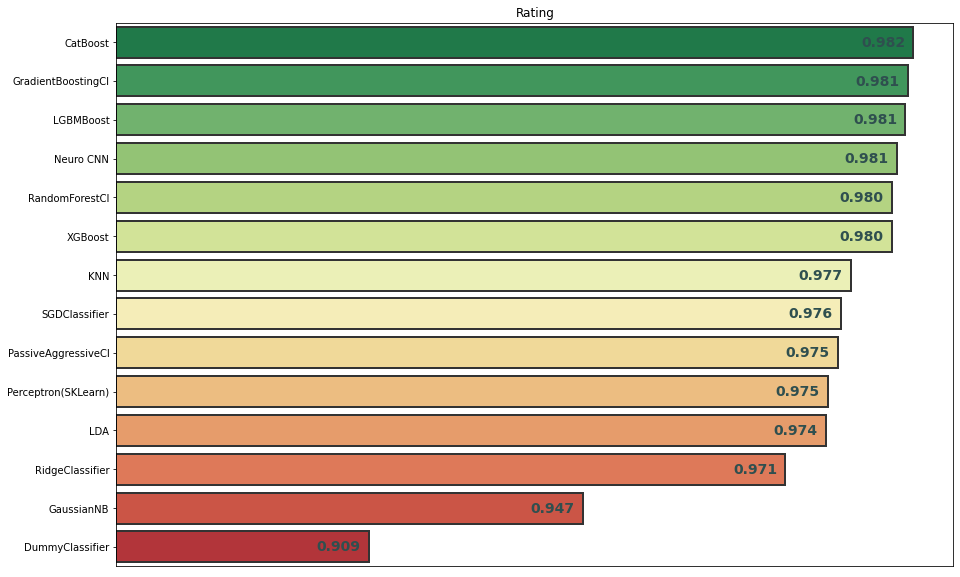

In [0]:
# visualization
y = [x[1] for x in sorted_]
labels = [x[0] for x in sorted_]

power_ = 15

plt.figure(figsize=(15, 10))
graph = sns.barplot(x=np.power(y, power_), y=labels,
                    palette=sns.color_palette("RdYlGn_r", len(y)),
                    edgecolor=".2", linewidth=2)
plt.xticks([])

for i, v in enumerate(y):
    graph.text(v**power_ - .05, i + 0.105, "%.3f" % v, color='darkslategray', fontweight='bold', size=14)
plt.title('Rating')
plt.savefig(PATH + 'rating_models', dpi=150)
plt.show()